In [1]:
import pandas as pd
import csv
import os
import numpy as np
import datetime
from xlsxwriter.workbook import Workbook
from xlsxwriter import Workbook
import time
from scipy import integrate, stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
from functools import reduce
import re
from sklearn import preprocessing
from matplotlib import colors as mcolors

# %matplotlib inline

In [2]:
Working_dir = os.getcwd()
Data_dir = os.path.join(Working_dir, 'Raw data')
Data_prep_dir = os.path.join(Working_dir, 'Preprocessed data')
Output_dir = os.path.join(Working_dir, 'Analysis')
Plots_dir = os.path.join(Output_dir, 'Plots')

In [3]:
nodes_file_names = ['May2018_idle.csv' , 'June2018_idle.csv', 'July2018_idle.csv', \
                    'September2018.csv', 'October2018.csv', 'November2018.csv', \
                    'December2018.csv' , 'January2019.csv']
nodes_df_names = [item.split('.')[0] for item in nodes_file_names]

## Pie-charts with *energy* portions used by CPU, memory and other sources

In [4]:
def plot_energy_cons(data, node, month, year, avg_flag=False, drop_flag=True):
    labels = 'CPU', 'Memory', 'Other'
    data = data.values
    colors = ['lightskyblue', 'lightcoral',  'yellowgreen']# 'gold', 
    
    fig1, ax1 = plt.subplots()
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
    plt.axis('equal')
    save_to = (os.path.join( Plots_dir, 'Categories_avg_en_' + month + '_' + year ) )
    if not avg_flag:
        plt.title(month + ' ' + year + ', Node '+ node)
        save_to = (os.path.join( Output_dir, 'Plots', 'Node_' + node + '_' + month + '_' + year ) )
    else:
        plt.title(month + ' ' + year)
        
    if drop_flag:
        save_to += '.png'
    else:
        save_to += '_no_drop.png'
    fig1.savefig(save_to)
    plt.show()

In [5]:
nodes_df_dict = {}
nodes_no_drop_df_dict = {}
for file_name, df_name in zip(nodes_file_names, nodes_df_names):
    nodes_df_dict[df_name] = pd.read_csv(os.path.join( Output_dir, 'nodes_stats_' + file_name), \
                                         delimiter=";", header=0, index_col=0)
    to_drop_ix = np.unique(np.append(\
                                     np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :].isna())[0], \
                                     np.where(nodes_df_dict[df_name].loc["dcenergy_error_percent", :] > 5.)[0]))
    to_drop = nodes_df_dict[df_name].iloc[:,to_drop_ix].columns.values
    nodes_no_drop_df_dict[df_name] = nodes_df_dict[df_name].copy()
    nodes_no_drop_df_dict[df_name] = nodes_no_drop_df_dict[df_name].replace([np.inf, -np.inf, np.nan],0)
    nodes_df_dict[df_name].drop(columns=to_drop, inplace=True)

In [6]:
def extract_mm_YYYY (string):
    year = re.findall(r'\d+', string)[0]
    month = string.split(year)[0]
    return month, year

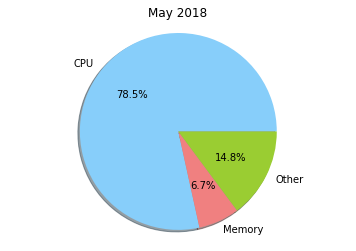

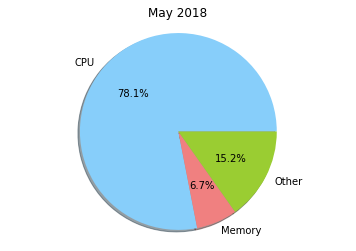

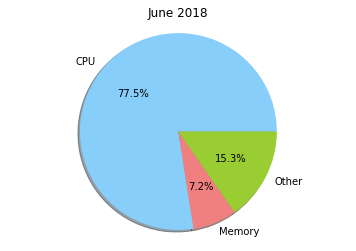

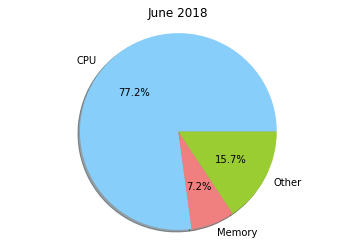

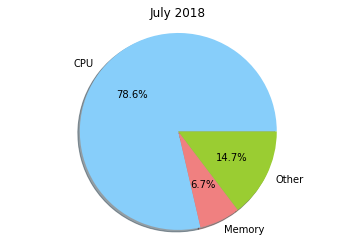

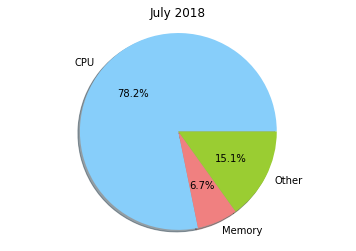

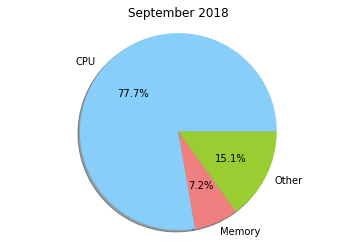

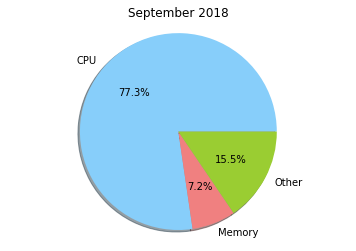

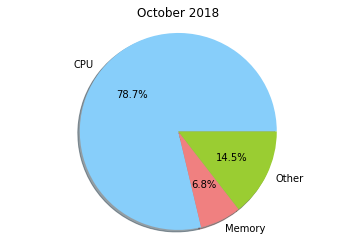

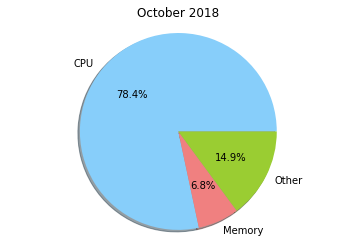

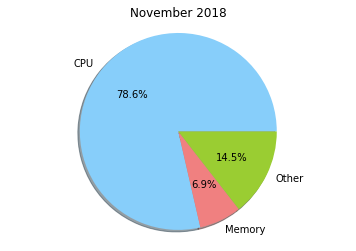

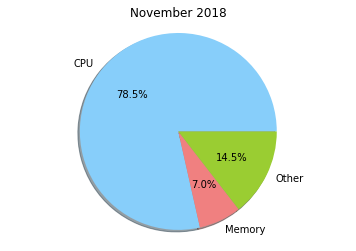

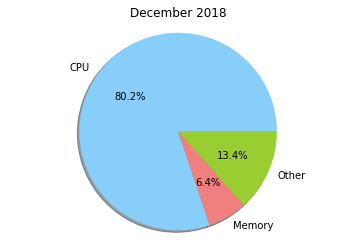

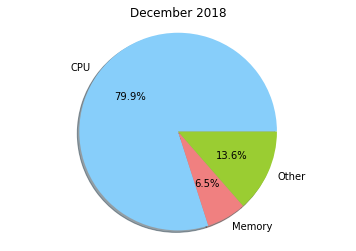

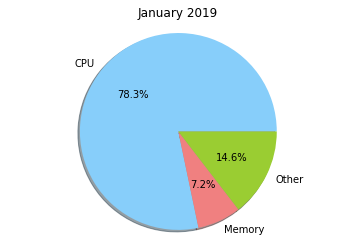

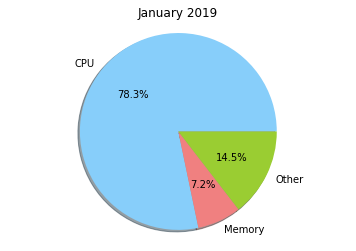

In [10]:
for df_name in nodes_df_names:
    year = re.findall(r'\d+', df_name)[0]
    month = df_name.split(year)[0]
    data = nodes_df_dict[df_name].iloc[5:8,:].mean(axis=1)
    plot_energy_cons(data=nodes_df_dict[df_name].iloc[5:8,:].mean(axis=1), \
                     node='', \
                     month=month, year=year, avg_flag=True)
    no_drop_data = nodes_no_drop_df_dict[df_name].iloc[5:8,:].mean(axis=1)
    if not np.array_equal(no_drop_data.values, data.values):
        plot_energy_cons(data=nodes_no_drop_df_dict[df_name].iloc[5:8,:].mean(axis=1), \
                     node='', \
                     month=month, year=year, avg_flag=True, drop_flag=False)

100.0


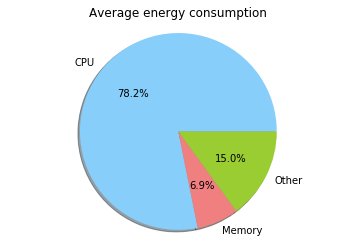

In [11]:
colors = ['lightskyblue', 'lightcoral',  'yellowgreen']
labels = 'CPU', 'Memory', 'Other'
data = pd.read_csv(os.path.join( Output_dir, 'nodes_summary_all_months.csv'), \
                                         delimiter=";", header=0, index_col=0).\
                    loc[['cpu_en_percent', 'mem_en_percent', 'other_en_percent'], 'avg_all_nodes']
fig1, ax1 = plt.subplots()
print(data.values.sum())
plt.pie(x=data.values, \
        labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Average energy consumption')
fig1.savefig(os.path.join( Output_dir, 'Plots', 'Categories_avg_en_cons_all_months.png' ) )
plt.show()

[77.37188187  6.8158842  15.81223393]


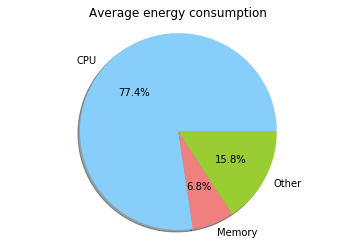

In [14]:
colors = ['lightskyblue', 'lightcoral',  'yellowgreen']
labels = 'CPU', 'Memory', 'Other'
data = pd.read_csv(os.path.join( Output_dir, 'nodes_summary_all_months_no_drop.csv'), \
                                         delimiter=";", header=0, index_col=0).\
                    loc[['cpu_en_percent', 'mem_en_percent', 'other_en_percent'], 'avg_all_nodes']
fig1, ax1 = plt.subplots()
print(data.values)
plt.pie(x=data.values, \
        labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Average energy consumption')
fig1.savefig(os.path.join( Output_dir, 'Plots', 'Categories_avg_en_cons_all_months_no_drop.png' ) )
plt.show()

## Energy consumption for each node - histogram for each month
- Nodes are sorted by their energy consumption
- Node IDs do not correspond to real node names like 1..cresc6x001. Node IDs are fictionary labels for ease of understanding the graph: 

    $y$ axis - energy consumed by a node during the month mentionted in the title;

    $x$ axis - all the nodes 

### a) Based on dcenergy measurements

198


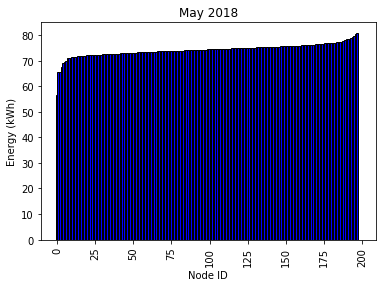

188


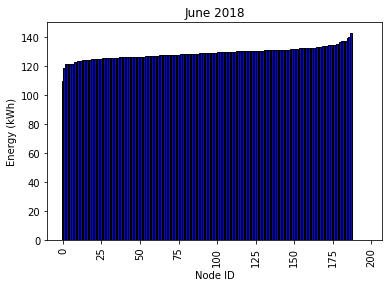

187


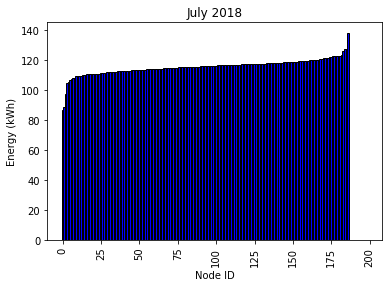

192


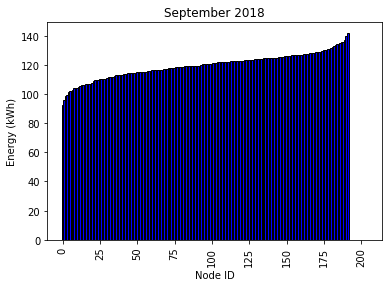

178


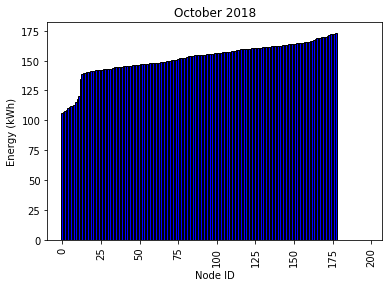

180


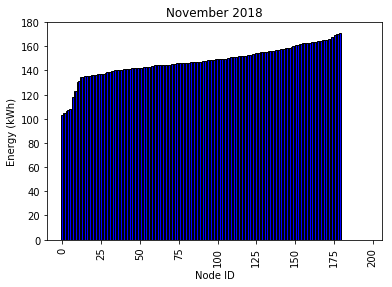

186


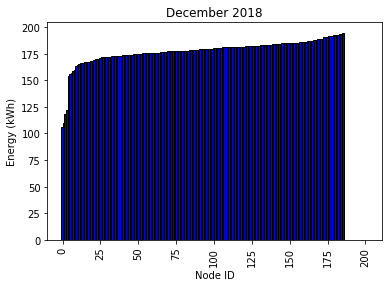

193


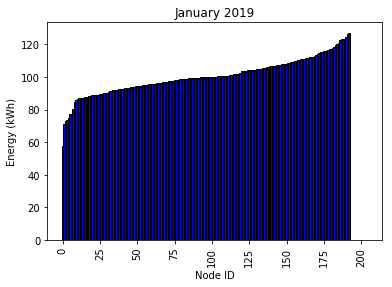

In [80]:
def plot_all_nodes_power_cons_per_month( data_dict, no_drop=False ):
    

for df_name in nodes_df_names:
    data = nodes_df_dict[df_name].loc['total_dcenergy',:].sort_values(ascending=True)
    fig, ax = plt.subplots()
    N = len(nodes_df_dict[df_name].columns.values)
    ind = np.arange(N)
    p1 = plt.bar(ind, data, color='blue', edgecolor='black', width=1.5)#en_exit_jobs_kWh
    plt.ylabel('Energy (kWh)')
    plt.xlabel('Node ID')
    plt.xticks([int(re.findall(r'\d+', x)[1]) for x in nodes_df_dict[df_name].columns.values][::10], rotation=90)
    month, year = extract_mm_YYYY(df_name)
    plt.title(month + ' ' + year)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    fig.savefig( os.path.join( Plots_dir, 'En_cons_by_nodes_' + df_name + '.png'),dpi=900)\
    plt.show()

In [88]:
for df_name in nodes_df_names:
    data = nodes_no_drop_df_dict[df_name].loc['total_dcenergy',:].sort_values(ascending=True)
    fig, ax = plt.subplots()
    N = len(nodes_no_drop_df_dict[df_name].columns.values)
    ind = np.arange(N)
    p1 = plt.bar(ind, data, color='blue', edgecolor='black', width=1.5)#en_exit_jobs_kWh
    plt.ylabel('Energy (kWh)')
    plt.xlabel('Node ID')
    plt.xticks([int(re.findall(r'\d+', x)[1]) for x in nodes_no_drop_df_dict[df_name].columns.values][::10], rotation=90)
    month, year = extract_mm_YYYY(df_name)
    plt.title(month + ' ' + year)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    fig.savefig( os.path.join( Plots_dir, 'En_cons_by_nodes_' + df_name + '.png'),dpi=900)\
    plt.show()

Index(['total_dcenergy', 'sys_energy', 'cpu_energy', 'mem_energy',
       'other_energy', 'cpu_en_percent', 'mem_en_percent', 'other_en_percent',
       'sys_util', 'mem_util', 'cpu_util', 'other_util', 'sys_power_max',
       'cpu_power_max', 'mem_power_max', 'dcenergy_error_percent'],
      dtype='object')

## b) Based on system energy calculation - without dropping nodes, where sys_energy <> dc_energy
Check DC energy graphs for May in the "Preprocessing" file: the problem is in energy meter and not in the power meter.

198


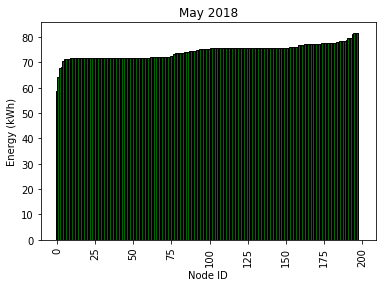

188


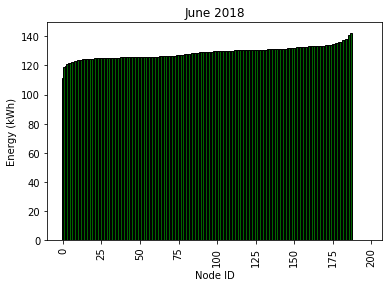

187


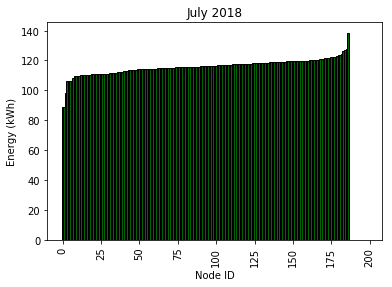

192


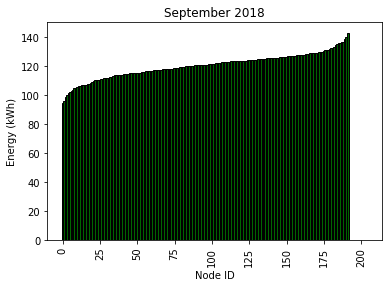

178


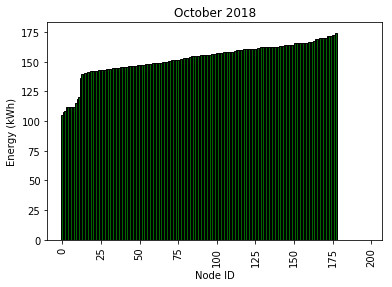

180


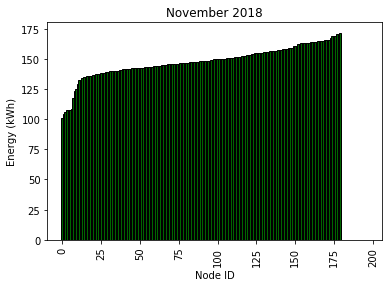

186


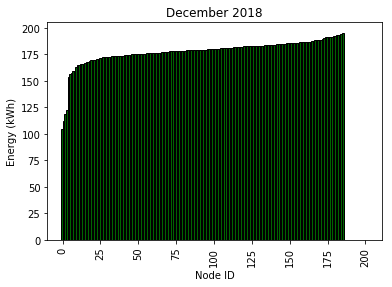

193


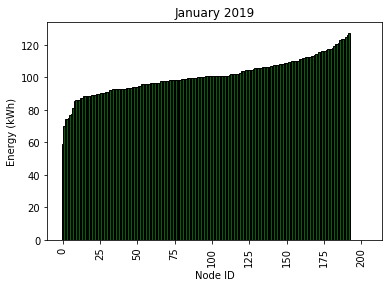

In [125]:
for df_name in nodes_df_names:
    data = nodes_no_drop_df_dict[df_name].loc['sys_energy',:].sort_values(ascending=True)
    
    fig, ax = plt.subplots()
    N = len(nodes_no_drop_df_dict[df_name].columns.values)
    print(N)
    ind = np.arange(N)
    p1 = plt.bar(ind, data, color='darkgreen', edgecolor='black', width=1.5)#en_exit_jobs_kWh
    plt.ylabel('Energy (kWh)')
    plt.xlabel('Node ID')
    plt.xticks([int(re.findall(r'\d+', x)[1]) for x in nodes_no_drop_df_dict[df_name].columns.values][::10], rotation=90)
    month, year = extract_mm_YYYY(df_name)
    plt.title(month + ' ' + year)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    fig.savefig( os.path.join( Plots_dir, 'Sys_cons_by_nodes_' + df_name + '.png'),dpi=900)
    plt.show()

-----
## Monthly energy consumption of the whole cluster 
### a) Based on dcenergy measurements - uneven data, missing data 

In [37]:
energy_by_month = pd.DataFrame(data=0, index=nodes_df_names, columns=['total_dcenergy_MWh', 'total_sys_energy_no_drop_MWh'])

for df_name in nodes_df_names:
    energy_by_month.loc[df_name, 'total_dcenergy_MWh'] = nodes_df_dict[df_name].loc['total_dcenergy', :].sum()
    energy_by_month.loc[df_name, 'total_sys_energy_no_drop_MWh'] = nodes_no_drop_df_dict[df_name].loc['sys_energy', :].sum()

energy_by_month = energy_by_month/1000.
energy_by_month

,total_dcenergy_MWh,total_sys_energy_no_drop_MWh
May2018_idle,14.693392,15.771181
June2018_idle,24.173116,27.456235
July2018_idle,21.623925,24.612235
September2018,22.968813,25.461171
October2018,27.047608,32.489893
November2018,26.539778,31.381910
December2018,33.022540,37.567169
January2019,19.393103,21.489630


In [38]:
print(energy_by_month.total_dcenergy_MWh.sum(), energy_by_month.total_sys_energy_no_drop_MWh.sum())

189.46227394 216.22942401944442


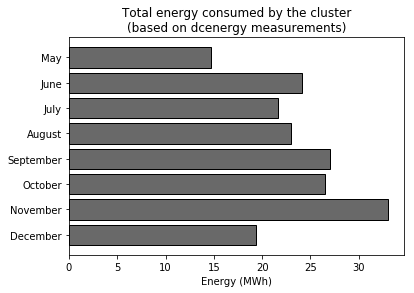

In [39]:
fig, ax = plt.subplots()

N = len(energy_by_month.index)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, energy_by_month.total_dcenergy_MWh, color='dimgrey', edgecolor='black')#saddlebrown
plt.title('Total energy consumed by the cluster\n(based on dcenergy measurements)')
plt.xlabel('Energy (MWh)')
plt.yticks(ind, ('May', 'June', 'July',\
                'August', 'September','October', 'November', 'December',\
                'January'))
ax.invert_yaxis()
fig.savefig(os.path.join(Plots_dir, 'energy_cons_by_month.png'),dpi=300)
plt.show()

## Monthly energy consumption of the whole cluster 
### b) Based on sys_power measurements - integral taken over time - more precise as all the nodes are present
However, the sys_power measurements can contain technical sensor uncertainties 

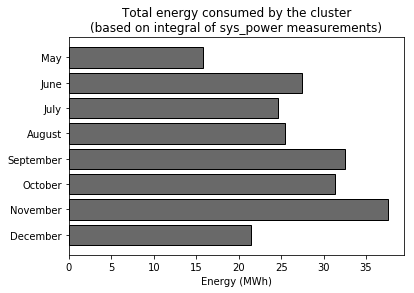

In [84]:
fig, ax = plt.subplots()

N = len(energy_by_month.index)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, energy_by_month.total_sys_energy_no_drop_MWh, color='dimgray', edgecolor='black')#saddlebrown

plt.title('Total energy consumed by the cluster\n(based on integral of sys_power measurements)')
plt.xlabel('Energy (MWh)')
plt.yticks(ind, ('May', 'June', 'July',\
                'August', 'September','October', 'November', 'December',\
                'January'))
ax.invert_yaxis()
fig.savefig(os.path.join(Plots_dir, 'energy_cons_by_month.png'),dpi=300)
plt.show()

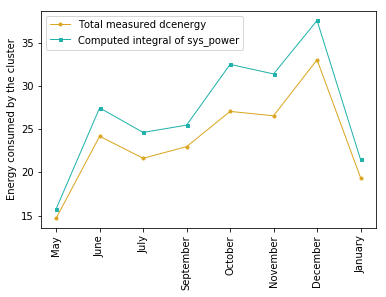

In [85]:
fig, ax = plt.subplots()

N = len(energy_by_month.index)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, energy_by_month.total_dcenergy_MWh, color='goldenrod', \
              linestyle='-', marker='o',\
              markersize=3, linewidth=1)#color='lightseagreen''k',linestyle=':'

p2 = plt.plot(ind, energy_by_month.total_sys_energy_no_drop_MWh, color='lightseagreen', \
              linestyle='-', marker='s',\
              markersize=3, linewidth=1)#color='lightseagreen''k',linestyle='-.'
lgd = plt.legend((p1[0], p2[0]), ( 'Total measured dcenergy', 'Computed integral of sys_power' ),\
           loc='upper left')
plt.ylabel('Energy consumed by the cluster')
plt.xticks(ind, ('May', 'June', 'July',\
                'September','October', 'November', 'December',\
                'January'), rotation=90)

fig.savefig(os.path.join(Plots_dir, 'Total_en_dcenergy_vs_sys_power_integral.png'), bbox_inches='tight',\
           dpi=1200)
plt.show()

-----
## Temperature profiles


### Node 3, monthly graph of exhaust temperature vs inlet teperature

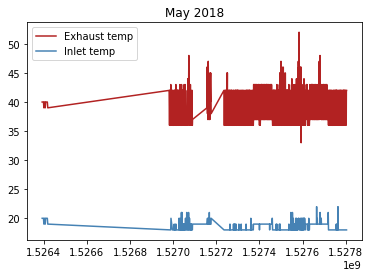

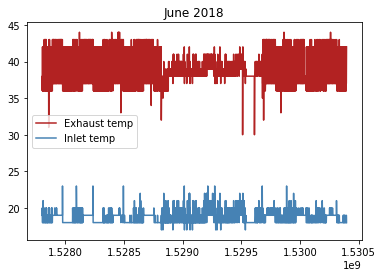

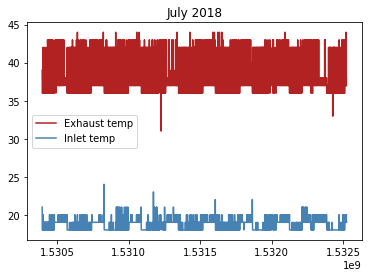

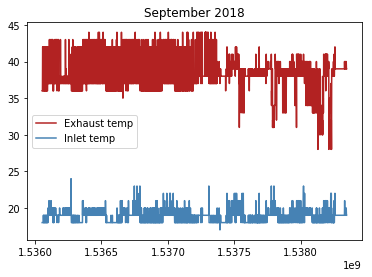

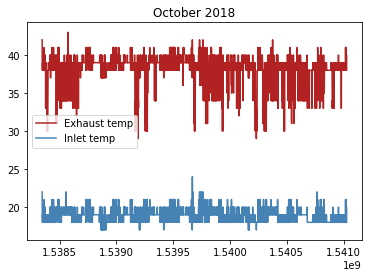

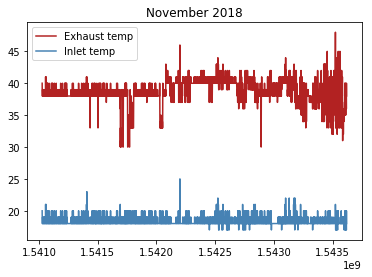

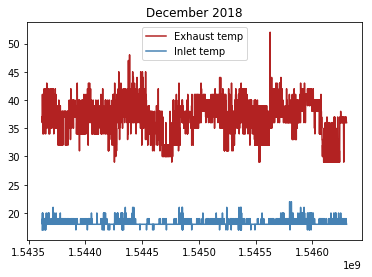

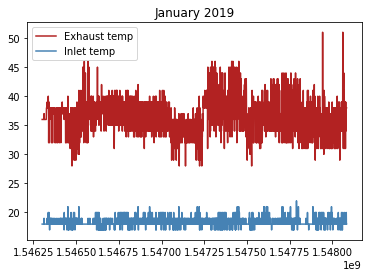

In [73]:
for file_name, df_name in zip(nodes_file_names, nodes_df_names):
    node_df = pd.read_csv( os.path.join( Data_prep_dir, file_name), delimiter=";", header=0 )
    p_exh = plt.plot('timestamp_measure', 'exh_temp', \
                     data=node_df[node_df.nodename=='cresco6x003'], \
                     label='Exhaust temp', color='firebrick')
    p_inlet = plt.plot('timestamp_measure', 'amb_temp', \
                       data=node_df[node_df.nodename=='cresco6x003'], \
                       label='Inlet temp', color='steelblue')
    month, year = extract_mm_YYYY(df_name)
    plt.title(month + ' ' + year)
    plt.legend()
#     p_cpu1 = plt.plot('timestamp_measure', 'cpu1_temp', data=node_df, label='CPU1 temp')
#     p_cpu2 = plt.plot('timestamp_measure', 'cpu2_temp', data=node_df, label='CPU2 temp')
    plt.show()

###  Node 3, monthly difference between exhaust and inlet temperature

c:\users\aagri\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


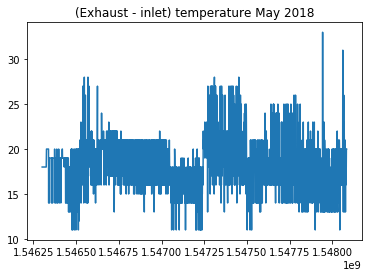

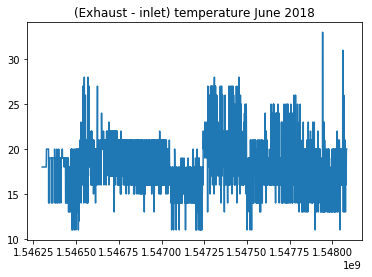

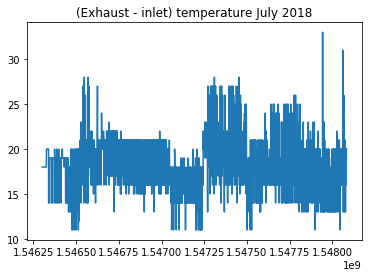

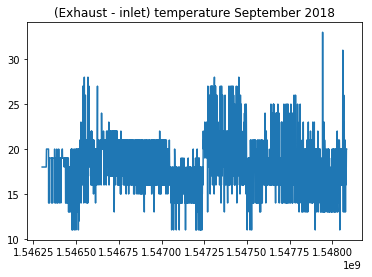

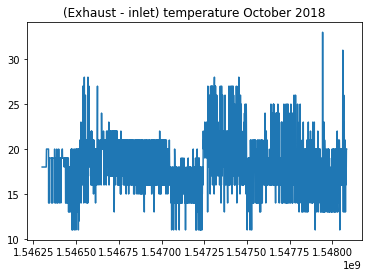

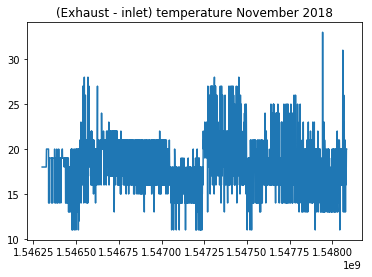

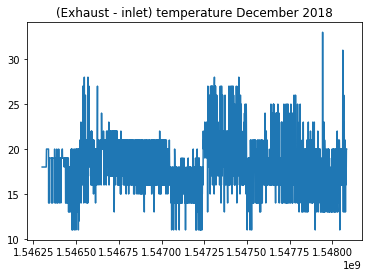

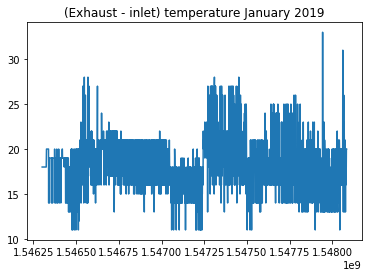

In [69]:
data=node_df[node_df.nodename=='cresco6x003']
for file_name, df_name in zip(nodes_file_names, nodes_df_names):
    node_df = pd.read_csv( os.path.join( Data_prep_dir, file_name), delimiter=";", header=0 )
    p_exh = plt.plot(data.timestamp_measure, data.exh_temp - data.amb_temp, )
    month, year = extract_mm_YYYY(df_name)
    plt.title('(Exhaust - inlet) temperature ' + month + ' ' + year)
    plt.legend()
    plt.show()

###  Node 3, monthly difference between exhaust and inlet temperature
### Scatterplot representation

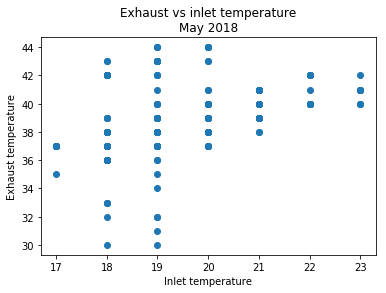

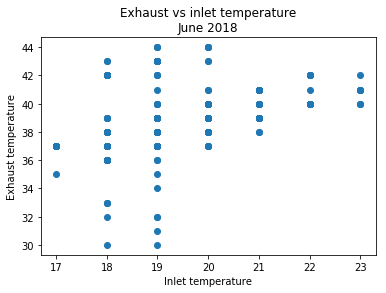

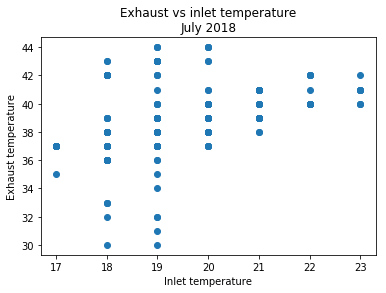

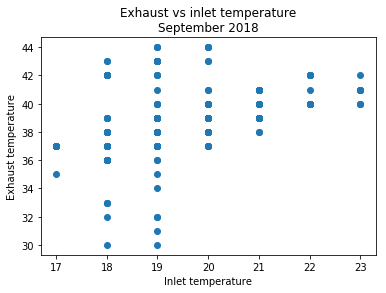

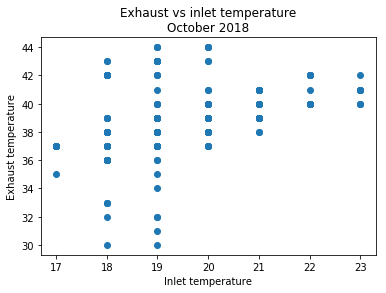

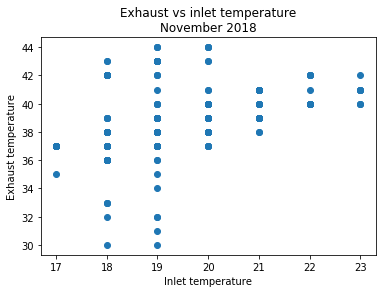

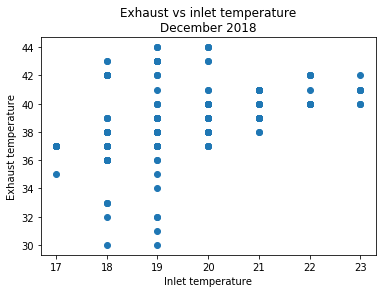

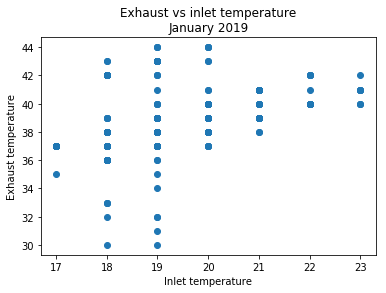

In [82]:
data=node_df[node_df.nodename=='cresco6x003']
for file_name, df_name in zip(nodes_file_names, nodes_df_names):
    node_df = pd.read_csv( os.path.join( Data_prep_dir, file_name), delimiter=";", header=0 )
    p_exh_vs_inlet = plt.plot(data.amb_temp, data.exh_temp, 'o' )
    month, year = extract_mm_YYYY(df_name)
    plt.title('Exhaust vs inlet temperature\n' + month + ' ' + year)
    plt.xlabel('Inlet temperature')
    plt.ylabel('Exhaust temperature')
    plt.show()

## Temperature, fans speed and CPU power trends - September

In [87]:
nodes_stats_Sept = pd.read_csv(os.path.join( Output_dir, 'nodes_stats_September2018.csv'), \
                                         delimiter=";", header=0, index_col=0)
to_drop_ix = np.unique(np.append(\
                                     np.where(nodes_stats_Sept.loc["dcenergy_error_percent", :].isna())[0], \
                                     np.where(nodes_stats_Sept.loc["dcenergy_error_percent", :] > 5.)[0]))
to_drop = nodes_stats_Sept.iloc[:,to_drop_ix].columns.values
node_df_Sept = pd.read_csv(os.path.join( Data_prep_dir, 'September2018.csv'), \
                                         delimiter=";", header=0)
for node in to_drop:
    node_df_Sept.drop(index=node_df_Sept[node_df_Sept.nodename == node].index)

### Normalize and recheck

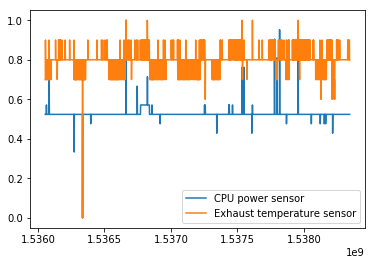

In [88]:
node_Sept_norm = node_df_Sept[node_df_Sept.nodename == node_df_Sept.nodename.unique()[0]].copy()

# node_Sept_norm.loc[:,['cpu_power', 'exh_temp']] = \
#     preprocessing.normalize(node_Sept_norm.loc[:,['cpu_power', 'exh_temp']], norm='max', axis=0)

node_Sept_norm.loc[:, ['cpu_power', 'cpu1_temp', 'cpu2_temp', 'exh_temp']] = \
    preprocessing.normalize(node_Sept_norm.loc[:, ['cpu_power','cpu1_temp', 'cpu2_temp', 'exh_temp']], norm='max', axis=0)
node_Sept_norm.exh_temp = round(node_Sept_norm.exh_temp, 1)
# plt.plot('timestamp_measure', \
#          preprocessing.normalize(node_Sept_norm.loc[:,['cpu_power', 'exh_temp']], norm='max', axis=0))
plt.plot('timestamp_measure','cpu_power', data=node_Sept_norm, label='CPU power sensor')
plt.plot('timestamp_measure','exh_temp', data=node_Sept_norm, label='Exhaust temperature sensor')
plt.legend()
plt.show()

In [75]:
# plt.plot('timestamp_measure','cpu_power', data=node_Sept_norm, label='CPU power sensor')
# plt.show()

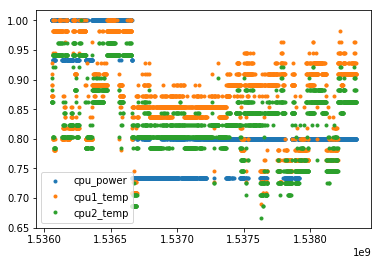

In [9]:
plt.plot('timestamp_measure', 'cpu_power', data=node_Sept_norm, label='cpu_power', linestyle='', marker='.')
plt.plot('timestamp_measure', 'cpu1_temp', data=node_Sept_norm, label='cpu1_temp', linestyle='', marker='.')
plt.plot('timestamp_measure', 'cpu2_temp', data=node_Sept_norm, label='cpu2_temp', linestyle='', marker='.')
plt.legend()
plt.show()

## Fans

In [80]:
# plt.plot('timestamp_measure', 'fan1a', data=node_Sept_norm, label='fan1a')
# plt.plot('timestamp_measure', 'fan2a', data=node_Sept_norm, label='fan2a')
# plt.plot('timestamp_measure', 'fan3a', data=node_Sept_norm, label='fan3a')
# plt.legend()
# plt.show()

In [79]:
# plt.plot('timestamp_measure', 'fan1a', data=node_Sept, label='fan1a')
# plt.plot('timestamp_measure', 'fan1b', data=node_Sept, label='fan1b')
# plt.legend()
# plt.show()

In [78]:
# plt.plot('timestamp_measure', 'fan2a', data=node_Sept, label='fan2a')
# plt.plot('timestamp_measure', 'fan2b', data=node_Sept, label='fan2b')
# plt.legend()
# plt.show()

In [77]:
# plt.plot('timestamp_measure', 'fan3a', data=node_Sept, label='fan3a')
# plt.plot('timestamp_measure', 'fan3b', data=node_Sept, label='fan3b')
# plt.legend()
# plt.show()

## Distance between CPU temperature and CPU power utilization

In [76]:
# plt.plot(abs(node_Sept_norm.cpu_power[:] - node_Sept_norm.cpu1_temp[:]).values, \
#          linestyle='-', marker='.')
# plt.title('Dist(CPU_power, CPU1_temp)')
# plt.legend()
# plt.show()

# plt.plot(abs(node_Sept_norm.cpu_power - node_Sept_norm.exh_temp).values, \
#          linestyle='-', marker='.')
# plt.title('Dist(CPU_power, exhaust_temp)')
# plt.legend()
# plt.show()

# Resume
- no obvious correlation 

        - between fans speed
        - between CPU temperature and CPU power utilization
        - between exhaust temperature and CPU power utilization
(more analysis required)

----
Started analysis of thermal data:
- temperature drop graph for node 3 (the node with all the data present for all months)
- exhaust and inlet temperature of the node
    - line graph
    - scatter plot

----

Graphs finalyzed, all in two versions, one with dcenergy measurements as primary source, another with integral of sys_power measurements (in this case data is present for all the nodes):
- portions of energy consumed by CPU, memory and other equipment
    - for each month
    - avg for all months
- monthly energy consumption by node, nodes are sorted in the increasing order of energy consumption
- energy consumed by the cluster
    - for each month
    - total sum for all months taking into account all nodes of the cluster 